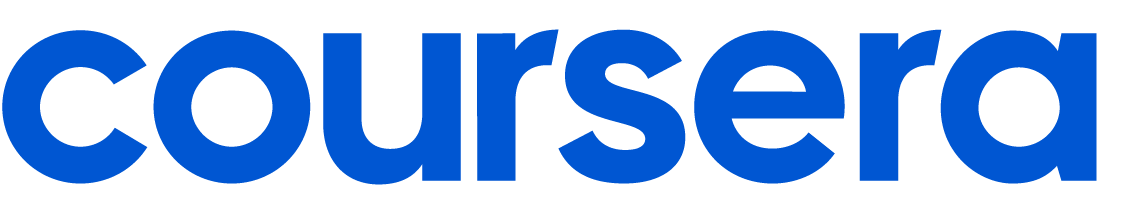

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use

from sklearn import (ensemble, preprocessing, tree)
pd.set_option('max_columns', 200)

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
#sns.pairplot(df, vars=current_features[0:2], hue = "MaritalStatus_Married")

In [7]:
train_df["CreditScore"].describe()

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

In [8]:
test_df["CreditScore"].describe()

count    109435.000000
mean        574.665948
std         158.800306
min         300.000000
25%         437.000000
50%         575.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

In [9]:
train_df["Default"].value_counts()

0    225694
1     29653
Name: Default, dtype: int64

In [10]:
train_df.isna().sum() # explore, if there are NaN fields in the training_set

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [11]:
train_df.isna().sum() # explore, if there are NaN fields in the training_set

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [12]:
train_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [13]:
test_df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000
mean,43.536483,82487.391036,127486.538667,574.665948,59.576315,2.501037,13.496206,36.086298,0.500263
std,15.015927,38966.033421,70703.100952,158.800306,34.548087,1.118149,6.647329,16.928304,0.231246
min,18.000000,15003.000000,5002.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,31.000000,48745.000000,66173.500000,437.000000,30.000000,2.000000,7.750000,24.000000,0.300000
50%,44.000000,82545.000000,127345.000000,575.000000,60.000000,3.000000,13.500000,36.000000,0.500000
75%,57.000000,116184.000000,188674.000000,712.000000,89.000000,4.000000,19.270000,48.000000,0.700000
max,69.000000,149999.000000,249995.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [14]:
# Encoding categorical columns. Drop the ones with high correlation (Like Yes is Opposite of No, so drop Yes)
train_df_categorical_ohe = pd.get_dummies(train_df[['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']], drop_first = True)
test_df_categorical_ohe = pd.get_dummies(test_df[['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']], drop_first = True)


In [15]:
drop_columns = ['LoanID',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [16]:
# Dropping the categorical colums
train_df_edit = train_df.drop(drop_columns, axis=1)
test_df_edit = test_df.drop(drop_columns, axis=1)

In [17]:
X_train = train_df_edit.drop(['Default'], axis=1)
Y_train = train_df_edit['Default']
X_test = test_df_edit.copy()

In [18]:
X_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
0,56,85994,50587,520,80,4,15.23,36,0.44
1,69,50432,124440,458,15,1,4.81,60,0.68
2,46,84208,129188,451,26,3,21.17,24,0.31
3,32,31713,44799,743,0,3,7.07,24,0.23
4,60,20437,9139,633,8,4,6.51,48,0.73
...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85
255343,32,51953,189899,511,14,2,11.55,24,0.21
255344,56,84820,208294,597,70,3,5.29,60,0.50
255345,42,85109,60575,809,40,1,20.90,48,0.44


In [19]:
from sklearn.preprocessing import normalize

In [20]:
# Normalizing the Datasets
cols_train = X_train.columns.tolist()
#sca = preprocessing.StandardScaler()
sca = preprocessing.MinMaxScaler()

X_train = sca.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = cols_train)

cols_test = X_test.columns.tolist()
#sca = preprocessing.StandardScaler()
sca = preprocessing.MinMaxScaler()
X_test = sca.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols_test)

#normalize the one hot vectors
cols_norm_train = train_df_categorical_ohe.columns.tolist()
cols_norm_test = test_df_categorical_ohe.columns.tolist()
norm_train = normalize(train_df_categorical_ohe, norm='l2', axis=0)
norm_test = normalize(test_df_categorical_ohe, norm='l2', axis=0)

In [21]:
norm_train = pd.DataFrame(norm_train, columns = cols_norm_train)
norm_test = pd.DataFrame(norm_test, columns = cols_norm_test)

In [22]:
X_train = pd.concat([X_train, norm_train], axis = 1)
x_test = pd.concat([X_test, norm_test], axis = 1)

In [23]:
X_train.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,0.499967,0.499999,0.500324,0.499571,0.500353,0.500345,0.499686,0.500539,0.500265,0.000990,0.000987,0.000987,0.000992,0.000988,0.000989,0.001144,0.001142,0.001399,0.001400,0.000887,0.000884,0.000887,0.000884,0.001399
std,0.293927,0.288617,0.289147,0.289442,0.291121,0.372339,0.288541,0.353528,0.288646,0.001714,0.001715,0.001715,0.001712,0.001714,0.001714,0.001615,0.001616,0.001399,0.001399,0.001769,0.001770,0.001769,0.001771,0.001399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254902,0.250561,0.249617,0.249545,0.252101,0.333333,0.250870,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.490196,0.499752,0.500231,0.499089,0.504202,0.333333,0.498261,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002799,0.002798,0.000000,0.000000,0.000000,0.000000,0.002798
75%,0.745098,0.749776,0.750962,0.750455,0.756303,0.666667,0.750000,0.750000,0.750000,0.003956,0.000000,0.000000,0.003948,0.000000,0.000000,0.003424,0.003430,0.002799,0.002798,0.000000,0.000000,0.000000,0.000000,0.002798
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.003956,0.003967,0.003967,0.003948,0.003962,0.003958,0.003424,0.003430,0.002799,0.002798,0.004415,0.004428,0.004416,0.004432,0.002798


In [24]:
x_test.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
count,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000,109435.000000
mean,0.500715,0.499899,0.499951,0.500302,0.500641,0.500346,0.499835,0.501798,0.500329,0.001513,0.001510,0.001501,0.001500,0.001520,0.001512,0.001742,0.001744,0.002135,0.002135,0.001360,0.001351,0.001348,0.001353,0.002139
std,0.294430,0.288646,0.288592,0.289254,0.290320,0.372716,0.289014,0.352673,0.289057,0.002617,0.002619,0.002624,0.002625,0.002613,0.002618,0.002470,0.002469,0.002140,0.002140,0.002700,0.002704,0.002706,0.002703,0.002136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.254902,0.249948,0.249687,0.249545,0.252101,0.333333,0.250000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.509804,0.500326,0.499373,0.500911,0.504202,0.666667,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004271
75%,0.764706,0.749511,0.749703,0.750455,0.747899,1.000000,0.750870,0.750000,0.750000,0.006040,0.000000,0.000000,0.000000,0.006011,0.006044,0.005245,0.005238,0.004280,0.004281,0.000000,0.000000,0.000000,0.000000,0.004271
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.006040,0.006053,0.006090,0.006093,0.006011,0.006044,0.005245,0.005238,0.004280,0.004281,0.006717,0.006763,0.006781,0.006755,0.004271


In [25]:
ds = pd.concat([X_train, Y_train], axis = 1)
ds

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Default
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.002799,0.002798,0.000000,0.000000,0.000000,0.004432,0.002798,0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.000000,0.003967,0.0,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004432,0.002798,0
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,0.000000,0.003967,0.0,0.000000,0.000000,0.003958,0.000000,0.00000,0.002799,0.002798,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0.003956,0.000000,0.0,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.000000,0.004415,0.000000,0.000000,0.000000,0.000000,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.000000,0.000000,0.0,0.000000,0.000000,0.003958,0.000000,0.00000,0.000000,0.002798,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,0.019608,0.170216,0.839522,0.438980,0.915966,1.000000,0.526522,0.00,0.9375,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004432,0.000000,0
255343,0.274510,0.273728,0.754693,0.384335,0.117647,0.333333,0.415217,0.25,0.1375,0.003956,0.000000,0.0,0.003948,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.004416,0.000000,0.000000,1
255344,0.745098,0.517189,0.829775,0.540984,0.588235,0.666667,0.143043,1.00,0.5000,0.003956,0.000000,0.0,0.000000,0.003962,0.000000,0.003424,0.00000,0.002799,0.002798,0.000000,0.000000,0.000000,0.000000,0.002798,0
255345,0.470588,0.519330,0.226838,0.927140,0.336134,0.000000,0.821739,0.75,0.4250,0.003956,0.000000,0.0,0.003948,0.000000,0.000000,0.000000,0.00343,0.002799,0.002798,0.000000,0.000000,0.000000,0.004432,0.000000,0


In [26]:
#sns.pairplot(ds, vars=["CreditScore", "EmploymentType_Unemployed", "LoanPurpose_Home"], hue = "Default")

In [27]:
train_df.corr()['Default'].abs().sort_values()

LoanTerm          0.000545
DTIRatio          0.019236
NumCreditLines    0.028330
CreditScore       0.034166
LoanAmount        0.086659
MonthsEmployed    0.097374
Income            0.099119
InterestRate      0.131273
Age               0.167783
Default           1.000000
Name: Default, dtype: float64

In [28]:
ds.dropna().corr()["Default"].abs().sort_values()

LoanTerm                        0.000545
EmploymentType_Self-employed    0.002714
LoanPurpose_Other               0.002737
LoanPurpose_Education           0.003512
EmploymentType_Part-time        0.006372
MaritalStatus_Single            0.006607
LoanPurpose_Business            0.011162
Education_Master's              0.013314
Education_PhD                   0.018447
DTIRatio                        0.019236
LoanPurpose_Home                0.021564
Education_High School           0.022831
HasMortgage_Yes                 0.022856
MaritalStatus_Married           0.026875
NumCreditLines                  0.028330
CreditScore                     0.034166
HasDependents_Yes               0.034678
EmploymentType_Unemployed       0.034957
HasCoSigner_Yes                 0.039109
LoanAmount                      0.086659
MonthsEmployed                  0.097374
Income                          0.099119
InterestRate                    0.131273
Age                             0.167783
Default         

In [29]:
#sns.heatmap(ds_corr, annot = True)

In [30]:
high_corr = ["LoanAmount", 
             "MonthsEmployed", 
             "Income",
             "InterestRate", 
             "Age"]

In [31]:
corr_drop = list(set(X_train.columns.to_list()).difference(set(high_corr)))

In [32]:
corr_drop

['HasMortgage_Yes',
 'MaritalStatus_Single',
 'EmploymentType_Part-time',
 'LoanPurpose_Business',
 'EmploymentType_Unemployed',
 'MaritalStatus_Married',
 'LoanPurpose_Education',
 'LoanPurpose_Home',
 'CreditScore',
 'Education_High School',
 'DTIRatio',
 'Education_PhD',
 'EmploymentType_Self-employed',
 'HasCoSigner_Yes',
 'LoanPurpose_Other',
 "Education_Master's",
 'LoanTerm',
 'NumCreditLines',
 'HasDependents_Yes']

In [33]:
x_test.drop(corr_drop, axis=1)

,Age,Income,LoanAmount,MonthsEmployed,InterestRate
0,0.274510,0.864040,0.158351,0.193277,0.178261
1,0.843137,0.883797,0.054695,0.731092,0.477826
2,0.725490,0.746733,0.599087,0.025210,0.152609
3,0.784314,0.592366,0.207300,0.201681,0.953478
4,0.882353,0.420190,0.754291,0.436975,0.871739
...,...,...,...,...,...
109430,0.960784,0.459028,0.420861,0.563025,0.370000
109431,0.509804,0.690902,0.953113,0.235294,0.332609
109432,0.705882,0.433517,0.055149,0.630252,0.661739
109433,0.823529,0.446628,0.136379,0.596639,0.682174


In [34]:
#X_train = X_train.drop(corr_drop, axis=1)
#x_test = x_test.drop(corr_drop, axis=1)


In [35]:
#ds = pd.concat([X_train, y_train], axis = 1)
x_train, x_dev, y_train, y_dev = train_test_split(X_train, Y_train, test_size=0.2, stratify=Y_train, random_state=0)

In [36]:
# Try Resampling
from sklearn.utils import resample

train_data = pd.concat([X_train, y_train], axis=1)
negative = train_data[train_data.Default==0]
positive = train_data[train_data.Default==1]

In [37]:
pos_upsampled = resample(positive,
 replace=True, # sample with replacement
 n_samples=len(negative), # match number in majority class
 random_state=27) # reproducible results
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.Default.value_counts()

1.0    180555
0.0    180555
Name: Default, dtype: int64

In [38]:
upsampled

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes,Default
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.002799,0.002798,0.000000,0.0,0.000000,0.004432,0.002798,0.0
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0.000000,0.003967,0.000000,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.004432,0.002798,0.0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0.000000,0.000000,0.000000,0.000000,0.000000,0.003958,0.000000,0.00000,0.000000,0.002798,0.000000,0.0,0.000000,0.000000,0.000000,0.0
6,0.392157,0.712509,0.702146,0.234973,0.672269,0.000000,0.743913,0.00,0.0750,0.000000,0.000000,0.000000,0.000000,0.000000,0.003958,0.000000,0.00343,0.002799,0.000000,0.000000,0.0,0.004416,0.000000,0.002798,0.0
7,0.745098,0.828169,0.614333,0.420765,0.563025,1.000000,0.267391,1.00,0.4125,0.000000,0.000000,0.003967,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.000000,0.000000,0.0,0.004416,0.000000,0.002798,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23357,0.215686,0.761369,0.975939,0.041894,0.050420,0.666667,0.470435,0.75,0.4375,0.000000,0.003967,0.000000,0.000000,0.003962,0.000000,0.000000,0.00343,0.002799,0.000000,0.000000,0.0,0.000000,0.004432,0.000000,1.0
131355,0.411765,0.120334,0.964886,0.590164,0.924370,0.000000,0.177826,0.25,0.6875,0.000000,0.000000,0.003967,0.003948,0.000000,0.000000,0.003424,0.00000,0.002799,0.000000,0.004415,0.0,0.000000,0.000000,0.002798,1.0
143053,0.372549,0.339291,0.064706,0.460838,0.277311,0.000000,0.810435,0.75,0.3625,0.000000,0.003967,0.000000,0.003948,0.000000,0.000000,0.003424,0.00000,0.002799,0.002798,0.000000,0.0,0.000000,0.004432,0.000000,1.0
115108,0.215686,0.063586,0.527586,0.571949,0.142857,0.333333,0.891304,0.75,0.4500,0.003956,0.000000,0.000000,0.000000,0.000000,0.003958,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.004432,0.000000,1.0


In [39]:
# downsample majority
neg_downsampled = resample(negative,
 replace=True, # sample with replacement
 n_samples=len(positive), # match number in minority class
 random_state=27) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([positive, neg_downsampled])
# check new class counts
downsampled.Default.value_counts()

0.0    23722
1.0    23722
Name: Default, dtype: int64

In [40]:
#from imblearn.over_sampling import SMOTE
# Separate input features and target

#X = df.drop(‘diagnosis’,axis=1)
#y = df[‘diagnosis’]

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
#sm = SMOTE(random_state=27, ratio=1.0)
#X_train, y_train = sm.fit_sample(X_train, y_train)
#X_train.shape, y_train.shape
#((314, 5), (314,)) #We now have 314 data items in our training set
#y_train = pd.DataFrame(y_train, columns = ['diagnosis'])
#y_train.diagnosis.value_counts()

In [41]:
x_train

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,Education_Master's,Education_PhD,EmploymentType_Part-time,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
254306,0.431373,0.293891,0.076690,0.938069,0.966387,1.000000,0.756522,0.75,0.9125,0.000000,0.000000,0.003967,0.000000,0.000000,0.000000,0.003424,0.00000,0.002799,0.002798,0.004415,0.000000,0.000000,0.000000,0.000000
7340,0.078431,0.525071,0.292891,0.870674,0.285714,0.666667,0.062609,1.00,0.1875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
42535,0.823529,0.303454,0.981792,0.045537,0.109244,0.000000,0.660000,0.50,0.0750,0.000000,0.000000,0.003967,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.002798,0.000000,0.000000,0.004416,0.000000,0.002798
6910,0.960784,0.773028,0.516778,0.670310,0.689076,1.000000,0.342174,1.00,0.3000,0.000000,0.000000,0.003967,0.000000,0.003962,0.000000,0.003424,0.00000,0.002799,0.000000,0.000000,0.000000,0.004416,0.000000,0.002798
44277,0.607843,0.273476,0.714689,0.102004,0.285714,0.000000,0.226522,0.75,0.5875,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003424,0.00000,0.000000,0.000000,0.000000,0.004428,0.000000,0.000000,0.002798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74222,0.117647,0.288698,0.981216,0.336976,0.529412,1.000000,0.274348,0.75,0.7875,0.000000,0.000000,0.000000,0.003948,0.000000,0.000000,0.003424,0.00000,0.002799,0.002798,0.000000,0.000000,0.000000,0.004432,0.000000
231092,1.000000,0.273239,0.045131,0.998179,0.672269,0.333333,0.933913,0.50,0.0875,0.003956,0.000000,0.000000,0.000000,0.003962,0.000000,0.003424,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
241380,0.254902,0.647886,0.252291,0.329690,0.823529,1.000000,0.574348,0.25,0.7250,0.000000,0.003967,0.000000,0.000000,0.000000,0.000000,0.003424,0.00000,0.002799,0.002798,0.000000,0.004428,0.000000,0.000000,0.000000
198755,0.078431,0.592264,0.457181,0.639344,0.193277,0.333333,0.971304,0.75,0.5125,0.003956,0.000000,0.000000,0.000000,0.003962,0.000000,0.003424,0.00000,0.002799,0.002798,0.000000,0.000000,0.004416,0.000000,0.002798


In [42]:
# your code here (optional)
# train_df.iloc[:,1].plot(kind = "hist", bins = 5)
# sns.pairplot(train_df, vars=current_features, hue = "Default")

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [43]:
#from sklearn.ensemble import (RandomForestClassifier,)

In [44]:
#rf = RandomForestClassifier(random_state = 42)
#rf.fit(X_train, y_train)

In [45]:
#prob = rf.predict(X_test)
#prob
x_train.shape[1]

24

In [46]:
import tensorflow as tf

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
 
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
#model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3200      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [142]:
hist = model.fit(x_train, y_train, validation_data=(x_dev, y_dev), epochs=10, batch_size=100)
#hist = model.fit(X_train, y_train, epochs=10, batch_size=100)

Train on 204277 samples, validate on 51070 samples
Epoch 1/10
204277/204277 [==============================] - 3s 15us/sample - loss: 0.3109 - accuracy: 0.8867 - val_loss: 0.3132 - val_accuracy: 0.8862
Epoch 2/10
204277/204277 [==============================] - 3s 15us/sample - loss: 0.3109 - accuracy: 0.8871 - val_loss: 0.3133 - val_accuracy: 0.8860
Epoch 3/10
204277/204277 [==============================] - 3s 15us/sample - loss: 0.3108 - accuracy: 0.8870 - val_loss: 0.3129 - val_accuracy: 0.8856
Epoch 4/10
204277/204277 [==============================] - 3s 15us/sample - loss: 0.3109 - accuracy: 0.8870 - val_loss: 0.3124 - val_accuracy: 0.8858
Epoch 5/10
204277/204277 [==============================] - 3s 15us/sample - loss: 0.3107 - accuracy: 0.8869 - val_loss: 0.3130 - val_accuracy: 0.8864
Epoch 6/10
204277/204277 [==============================] - 3s 15us/sample - loss: 0.3108 - accuracy: 0.8869 - val_loss: 0.3132 - val_accuracy: 0.8859
Epoch 7/10
204277/204277 [=================

In [143]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
#dummy_clf = DummyClassifier(strategy="stratified")
#dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

In [144]:
#predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
#predicted_probability

[]

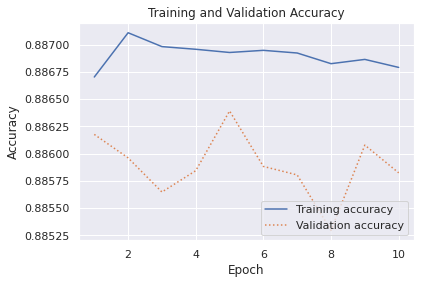

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [146]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
#predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
#predicted_probability = model.predict(x_test) > 0.2488
#predicted_probability = model.predict(x_test) > 0.13
predicted_probability = model.predict(x_test) > 0.095
predicted_probability = predicted_probability.astype(np.int).T.flatten()
predicted_probability
pd.Series(predicted_probability).value_counts(normalize=True)

0    0.639914
1    0.360086
dtype: float64

In [147]:
y_train.value_counts(normalize=True)

0    0.883873
1    0.116127
Name: Default, dtype: float64

In [148]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [149]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0
1,JDL5RH07AM,0
2,STAL716Y79,0
3,SO0KKJ3IQB,1
4,T99CWTYDCP,1
5,0SNHFWV4UP,0
6,S6ITP6LGYS,0
7,A6I7U12IRJ,0
8,8W6KY50JU4,0
9,THFQ08OLMU,0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [150]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [151]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [152]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [153]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [154]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!